<a href="https://colab.research.google.com/github/amaan-zafar/topic-modelling/blob/main/TM_Webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [25]:
import re
import requests
from bs4 import BeautifulSoup 
import json

**Image of types of texts/ads not included**

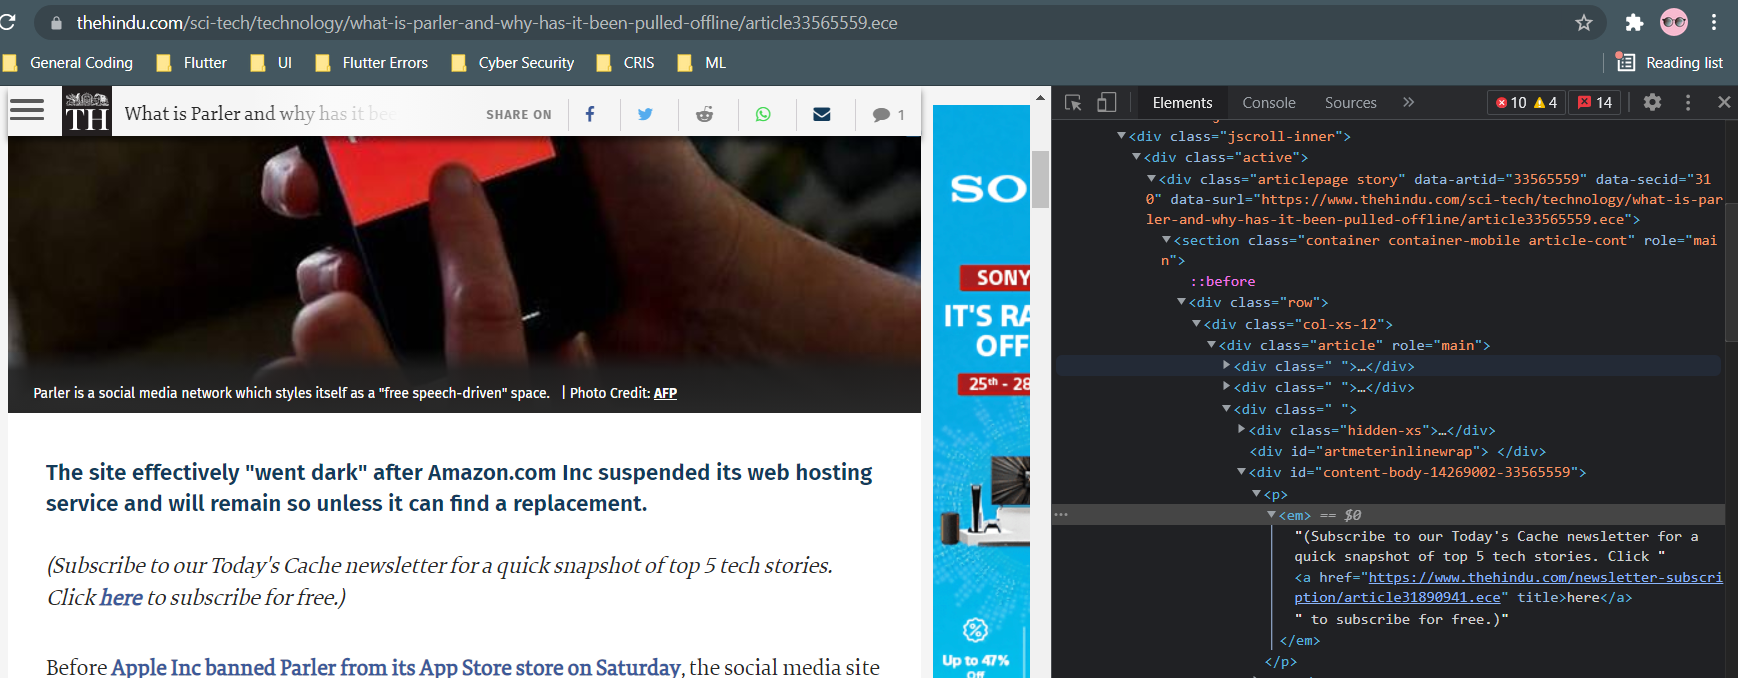

In [26]:
# To get all header and p tag texts (with conditions) from any soup
def get_text(soup):
  all_text = []
  for text in soup.find_all(['h1', 'h2', 'h3', 'h4', 'p']):
    # Not taking Subscription ad texts
    if(text.getText().startswith('(Subscribe to') or text.getText().startswith('Subscribe to')):
      continue
    all_text.append(text.getText())
  return ''.join(all_text)
  return all_text

**Generating URLs for date 11th Jan to 14th Jan**

In [27]:
date_urls = []
for i in range(11,15):
  if (i<10):
    date='0' + str(i)
  else:
    date=str(i)
  url = 'https://www.thehindu.com/archive/web/2021/01/' + date + '/'
  date_urls.append(url)
date_urls

['https://www.thehindu.com/archive/web/2021/01/11/',
 'https://www.thehindu.com/archive/web/2021/01/12/',
 'https://www.thehindu.com/archive/web/2021/01/13/',
 'https://www.thehindu.com/archive/web/2021/01/14/']

**Getting urls of all links from each page from 11th to 14th Jan**

In [30]:
flat_link_list = []
page_links_count = []

for url in date_urls:
  page = requests.get(url)
  soup = BeautifulSoup(page.content, "html.parser")
  links_count = 0
  div_container = soup.find("div", class_="tpaper-container")
  sections = div_container.find_all("section")
  for section in sections:
    section_container = section.find("div", class_ = "section-container")
    li_list = section_container.find_all("li")
    for li in li_list:
      anchors = li.find_all("a", href=True)
      for a in anchors:
        flat_link_list.append(a['href'])
        links_count += 1
  page_links_count.append(links_count)

flat_link_list

['https://www.thehindu.com/sport/other-sports/divyansh-pips-rudrankksh-for-top-spot/article33545114.ece',
 'https://www.thehindu.com/sport/races/lombardy-proves-her-class-in-hrc-golconda-1000-guineas/article33550822.ece',
 'https://www.thehindu.com/sport/races/victory-parade-race-for-the-stars-demerara-pirates-love-and-sanctuary-cove-impress/article33550236.ece',
 'https://www.thehindu.com/sport/races/lombardy-for-hrc-golconda-1000-guineas/article33543375.ece',
 'https://www.thehindu.com/sci-tech/technology/isro-to-adopt-100-atal-tinkering-labs-to-promote-scientific-temperament-among-students/article33550422.ece',
 'https://www.thehindu.com/sci-tech/technology/among-us-was-most-downloaded-mobile-game-in-2020/article33549334.ece',
 'https://www.thehindu.com/sci-tech/technology/how-farmville-created-a-social-gaming-landscape/article33549248.ece',
 'https://www.thehindu.com/sci-tech/technology/whatsapp-alternatives-signal-telegram-spike-session-threema-privacy-policy/article33549167.ece',

In [31]:
print(page_links_count)
print(len(flat_link_list))

[366, 424, 413, 235]
1438


**Recursively webscraping all links**

In [32]:
text_list = []
success = 0
crossword_articles = 0
for url in flat_link_list:
  response = requests.get(url)
  if response.status_code == 200:
    success += 1
    soup = BeautifulSoup(response.content, "html.parser")
    if (url.startswith('https://crossword')):
      crossword_articles += 1
      title = soup.find('h3', class_ = 'blog-article-title')
      body = soup.find('div', class_ = 'blogartpara')
    else:
      title = soup.find('h1', class_ = 'title')
      intro = soup.find('h2', class_ = 'intro')
      body = soup.find('div', id = re.compile("^content-body"))

    title_text = '' if title is None else title.getText()
    intro_text = '' if intro is None else intro.getText()
    body_text = '' if body is None else get_text(body)
    complete_text = title_text + intro_text+ body_text
    text_list.append(complete_text)
  else:
    continue

text_list[0]

'\nDivyansh pips Rudrankksh for top spot\n\nKavi Rakshna takes the honours in the women’s air rifle\nWorld No. 1 in men’s air rifle, Divyansh Singh Panwar asserted his class by rising to the top position in the second competition of the National shooting selection trials on Sunday.Qualifiying in the eighth place with 628.7 points, a mere 0.1 point ahead of Srinjoy Datta, Divyansh shot 250.9 in the final, to beat Rudrankksh Patil by 0.8 point for the top spot.Hazarika thirdWorld junior champion Hriday Hazarika, who had won the first trial, was pushed to the third spot. Youth Olympics silver medallist Shahu Tushar Mane placed fourth while qualification topper Arjun Babuta (632.1) finished seventh.In the women’s section, Kavi Rakshna of Tamil Nadu emerged on top with 251.4, as she beat qualification topper Nisha Kanwar (630.7) by 0.7 point. Remarkably, Kavi had risen to the top spot after having placed seventh in qualification. World No. 1 and winner of first trial, Elavenil Valarivan pla

In [33]:
print('No. of Crossword Articles are : ' + str(crossword_articles))

No. of Crossword Articles are : 3


**Calculating success ratio of the URLS hit**

In [34]:
success_ratio = success / len(flat_link_list)
print('No of web page hits : ' + str(len(flat_link_list)))
print('Successful web page hits : ' + str(success))
print('Success ratio : ' + str(success_ratio))

No of web page hits : 1438
Successful web page hits : 1438
Success ratio : 1.0


In [35]:
len(text_list)

1438

**Calculating length of texts scraped from each web page**

In [36]:
text_len_list = []
for i in range(len(text_list)):
  text_len_list.append(len(text_list[i]))
print(text_len_list)

[1923, 4314, 2169, 4390, 2225, 1559, 4330, 6811, 6665, 2167, 7027, 3945, 4415, 2505, 2276, 2275, 798, 1221, 1225, 5441, 1766, 5377, 1186, 1782, 5367, 5571, 4009, 2301, 2054, 2611, 1701, 2779, 1303, 2852, 2685, 1343, 1677, 1385, 4035, 991, 2135, 924, 849, 753, 3511, 1270, 1957, 987, 2855, 2471, 5313, 996, 3319, 2665, 1412, 4016, 1928, 1260, 4949, 1788, 3349, 2565, 1979, 1699, 2786, 2397, 2162, 1140, 2555, 1216, 5933, 1044, 1908, 2231, 1858, 1293, 2249, 1230, 3132, 2027, 1816, 885, 1464, 664, 1726, 1478, 776, 2907, 1406, 1544, 2155, 1687, 2035, 727, 1526, 2176, 3703, 1594, 1737, 1939, 2542, 1993, 2709, 2448, 2403, 1896, 982, 1642, 3527, 1698, 2149, 2168, 1519, 1132, 1711, 830, 2056, 1416, 1640, 2333, 1896, 952, 1877, 2590, 2873, 5543, 5093, 1082, 1263, 2617, 1655, 2420, 2643, 1315, 1560, 2369, 2779, 879, 812, 1356, 2148, 1435, 1175, 1809, 2717, 1005, 2289, 1652, 2707, 1941, 994, 1408, 734, 1436, 1160, 271, 1800, 1227, 1149, 2310, 2992, 1800, 2527, 2110, 2174, 3587, 911, 2403, 947, 5158, 

In [37]:
filename_list = []
index = 0
for i in range(11,15):
  for j in range(page_links_count[index]):
    filename = 'thehindu_jan_' + str(i) + '_file_' + str(j+1) + '.json'
    filename_list.append(filename)
  index += 1
filename_list

['thehindu_jan_11_file_1.json',
 'thehindu_jan_11_file_2.json',
 'thehindu_jan_11_file_3.json',
 'thehindu_jan_11_file_4.json',
 'thehindu_jan_11_file_5.json',
 'thehindu_jan_11_file_6.json',
 'thehindu_jan_11_file_7.json',
 'thehindu_jan_11_file_8.json',
 'thehindu_jan_11_file_9.json',
 'thehindu_jan_11_file_10.json',
 'thehindu_jan_11_file_11.json',
 'thehindu_jan_11_file_12.json',
 'thehindu_jan_11_file_13.json',
 'thehindu_jan_11_file_14.json',
 'thehindu_jan_11_file_15.json',
 'thehindu_jan_11_file_16.json',
 'thehindu_jan_11_file_17.json',
 'thehindu_jan_11_file_18.json',
 'thehindu_jan_11_file_19.json',
 'thehindu_jan_11_file_20.json',
 'thehindu_jan_11_file_21.json',
 'thehindu_jan_11_file_22.json',
 'thehindu_jan_11_file_23.json',
 'thehindu_jan_11_file_24.json',
 'thehindu_jan_11_file_25.json',
 'thehindu_jan_11_file_26.json',
 'thehindu_jan_11_file_27.json',
 'thehindu_jan_11_file_28.json',
 'thehindu_jan_11_file_29.json',
 'thehindu_jan_11_file_30.json',
 'thehindu_jan_11_f

In [38]:
len(filename_list)

1438

In [39]:
import pandas as pd
df = pd.DataFrame(zip(filename_list, text_list, text_len_list),
               columns =['File Name', 'Scraped Text', 'Text Length'])
df.tail()

,File Name,Scraped Text,Text Length
1433,thehindu_jan_14_file_231.json,"\nPetrol, diesel prices hiked again, scale new...",3054
1434,thehindu_jan_14_file_232.json,\nRupee gains 11 paise to finish at 73.04 agai...,1198
1435,thehindu_jan_14_file_233.json,\nRupee slips 3 paise to 73.18 against U.S. do...,1720
1436,thehindu_jan_14_file_234.json,\nSensex drops over 150 points in early trade;...,2402
1437,thehindu_jan_14_file_235.json,Clued In #221 | Artful clues improve your reca...,142


3.0698046601199644


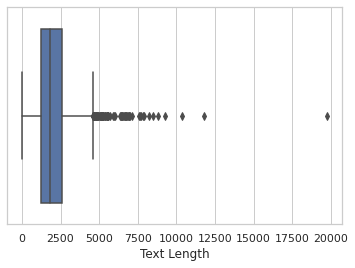

In [40]:
print(df['Text Length'].skew())
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Text Length"])

**Removing those files that have text length less than 5 perecentile or greater than 95 percentile**

In [41]:
lower_cutoff = df['Text Length'].quantile(0.05)
upper_cutoff = df['Text Length'].quantile(0.95)

In [42]:
drop_list = []
val = 0
for i in range(len(df)):
  val = df['Text Length'].values[i]
  if (val<lower_cutoff) or (val>upper_cutoff):
    drop_list.append(i)
for m in drop_list:  
  df.drop(m, inplace = True)

0.7856857673534903


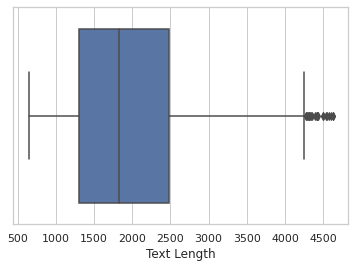

In [43]:
print(df['Text Length'].skew())
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Text Length"])

In [44]:
new_text_list = []
for i in range(len(df)):
  new_text_list.append(df['Scraped Text'].values[i])
new_text_list

['\nDivyansh pips Rudrankksh for top spot\n\nKavi Rakshna takes the honours in the women’s air rifle\nWorld No. 1 in men’s air rifle, Divyansh Singh Panwar asserted his class by rising to the top position in the second competition of the National shooting selection trials on Sunday.Qualifiying in the eighth place with 628.7 points, a mere 0.1 point ahead of Srinjoy Datta, Divyansh shot 250.9 in the final, to beat Rudrankksh Patil by 0.8 point for the top spot.Hazarika thirdWorld junior champion Hriday Hazarika, who had won the first trial, was pushed to the third spot. Youth Olympics silver medallist Shahu Tushar Mane placed fourth while qualification topper Arjun Babuta (632.1) finished seventh.In the women’s section, Kavi Rakshna of Tamil Nadu emerged on top with 251.4, as she beat qualification topper Nisha Kanwar (630.7) by 0.7 point. Remarkably, Kavi had risen to the top spot after having placed seventh in qualification. World No. 1 and winner of first trial, Elavenil Valarivan pl

In [45]:
new_filename_list = []
for i in range(len(df)):
  new_filename_list.append(df['File Name'].values[i])

print(len(new_filename_list))
new_filename_list

1294


['thehindu_jan_11_file_1.json',
 'thehindu_jan_11_file_2.json',
 'thehindu_jan_11_file_3.json',
 'thehindu_jan_11_file_4.json',
 'thehindu_jan_11_file_5.json',
 'thehindu_jan_11_file_6.json',
 'thehindu_jan_11_file_7.json',
 'thehindu_jan_11_file_10.json',
 'thehindu_jan_11_file_12.json',
 'thehindu_jan_11_file_13.json',
 'thehindu_jan_11_file_14.json',
 'thehindu_jan_11_file_15.json',
 'thehindu_jan_11_file_16.json',
 'thehindu_jan_11_file_17.json',
 'thehindu_jan_11_file_18.json',
 'thehindu_jan_11_file_19.json',
 'thehindu_jan_11_file_21.json',
 'thehindu_jan_11_file_23.json',
 'thehindu_jan_11_file_24.json',
 'thehindu_jan_11_file_27.json',
 'thehindu_jan_11_file_28.json',
 'thehindu_jan_11_file_29.json',
 'thehindu_jan_11_file_30.json',
 'thehindu_jan_11_file_31.json',
 'thehindu_jan_11_file_32.json',
 'thehindu_jan_11_file_33.json',
 'thehindu_jan_11_file_34.json',
 'thehindu_jan_11_file_35.json',
 'thehindu_jan_11_file_36.json',
 'thehindu_jan_11_file_37.json',
 'thehindu_jan_11

In [48]:
for i in range(len(new_filename_list)):
  dict = {}
  dict['text'] = new_text_list[i]
  with open(new_filename_list[i], "w") as outfile: 
    json.dump(dict, outfile)

**Moving the files from Google colab directory to save in Google Drive in the desired folder**

In [49]:
import os 
import shutil
for file in new_filename_list:
  date = file.split('jan_')[1].split('_')[0]
  shutil.move(f"/content/{file}", f"/content/drive/MyDrive/JAN01-JAN14/Jan{date}")